In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_QL_L180/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Collect Data

In [6]:
analyzer.copy_data_from_directory(source_data_filepath)

run not yet complete
L_180_beta_1.600000_itheta_0.000000_ntherm_0_nMC_10000_freq_1
Status: 5022 lines written
run not yet complete
L_180_beta_1.600000_itheta_0.392699_ntherm_0_nMC_10000_freq_1
Status: 123 lines written
run not yet complete
L_180_beta_1.600000_itheta_0.785398_ntherm_0_nMC_10000_freq_1
Status: 39 lines written
run not yet complete
L_180_beta_1.600000_itheta_1.570796_ntherm_0_nMC_10000_freq_1
Status: 5191 lines written
run not yet complete
L_180_beta_1.600000_itheta_2.356194_ntherm_0_nMC_10000_freq_1
Status: 4110 lines written
run not yet complete
L_180_beta_1.600000_itheta_2.748894_ntherm_0_nMC_10000_freq_1
Status: 4067 lines written
run not yet complete
L_180_beta_1.600000_itheta_3.534292_ntherm_0_nMC_10000_freq_1
Status: 3900 lines written


## Basic statistics

In [7]:
df = analyzer.get_data()

In [8]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,203.0,-31701.860263,-31941.014004,-0.003313,0.004017,-0.000656,0.659568,8.0,...,490,755,755,1,0.629697,4.491934,0.127075,0.036342,0.030606,-0.218331
1,1,32400.0,231.0,-40504.294619,-40776.435083,-0.004435,0.004017,-0.000656,0.583642,16.0,...,490,755,755,1,0.728564,5.197200,0.127075,0.036342,0.026453,-0.188703
2,2,32400.0,240.0,-46005.836939,-46288.580278,-0.004663,0.004017,-0.000656,0.537346,24.0,...,490,755,755,1,0.747056,5.329118,0.127075,0.036342,0.025798,-0.184032
3,3,32400.0,207.0,-49547.906429,-49791.772559,-0.005438,0.004017,-0.000656,0.503372,31.0,...,490,755,755,1,0.806752,5.754959,0.127075,0.036342,0.023889,-0.170414
4,4,32400.0,200.0,-51880.687218,-52116.306667,-0.006818,0.004017,-0.000656,0.477611,39.0,...,490,755,755,1,0.903336,6.443934,0.127075,0.036342,0.021335,-0.152194


In [9]:
df["itheta"].unique()

array([1.178097, 1.963495, 3.141593])

In [10]:
df_stats = analyzer.do_stats(therm = 0)

In [11]:
df_stats.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,1.178097,1.6,10000.0,0.0,1.0,32400.0,13.6395,-66950.198127,-66966.266785,...,0.010374,0.428173,3.054366,0.0,0.0,0.002307,0.016454,75404.0,1256.733333,20.945556
1,180.0,1.963495,1.6,10000.0,0.0,1.0,32400.0,29.7850,-66774.747461,-66833.230171,...,0.010415,0.006082,2.727224,0.0,0.0,0.000025,0.011288,91077.0,1517.950000,25.299167
2,180.0,3.141593,1.6,10000.0,0.0,1.0,32400.0,74.0504,-66268.850435,-66501.486628,...,0.010345,5.070743,2.152973,0.0,0.0,0.007030,0.003402,74440.0,1240.666667,20.677778


# Observable quick plots (seaborn)

### Q_L

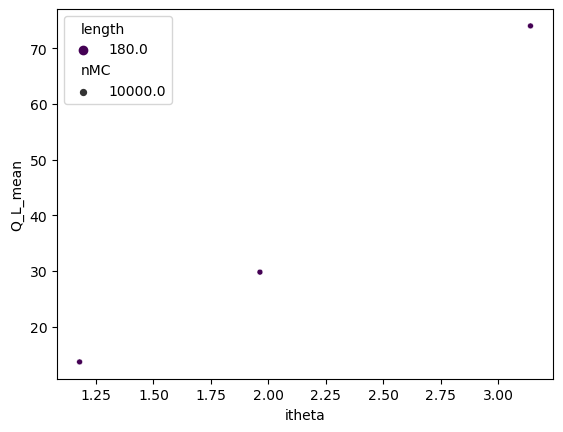

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

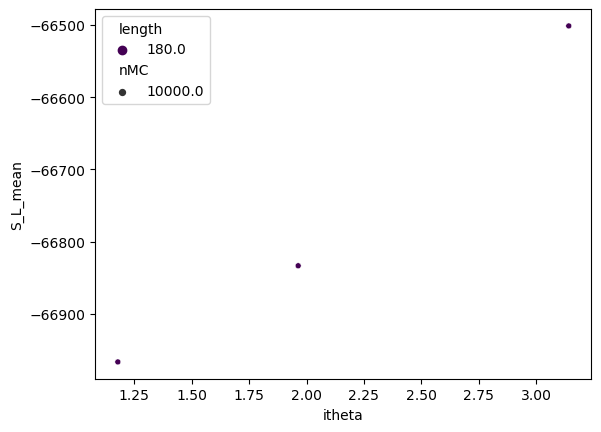

In [13]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

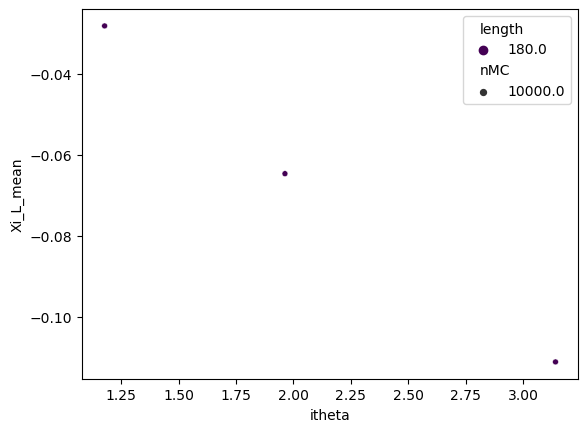

In [14]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

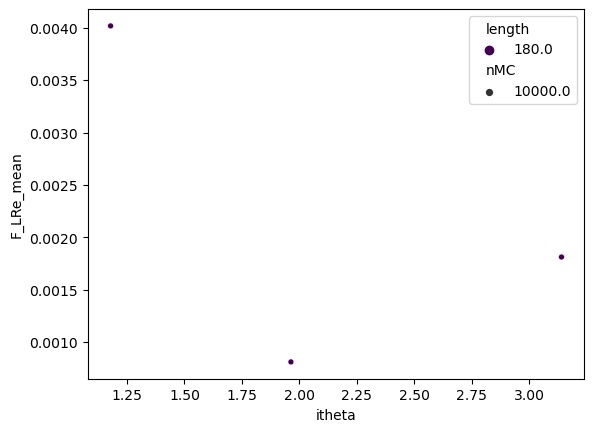

In [15]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [16]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
  Source          
0 C++    -0.000656
  Python  0.036342
1 C++    -0.004465
  Python  0.000197
2 C++     0.005203

In [17]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [18]:
F_L_df.head()

F_L_Re    F_L_Im
  Source                    
0 C++     0.004017 -0.000656
  Python  0.127075  0.036342
1 C++     0.000811 -0.004465
  Python  0.044062  0.000197
2 C++     0.001812  0.005203

## Correlation Length

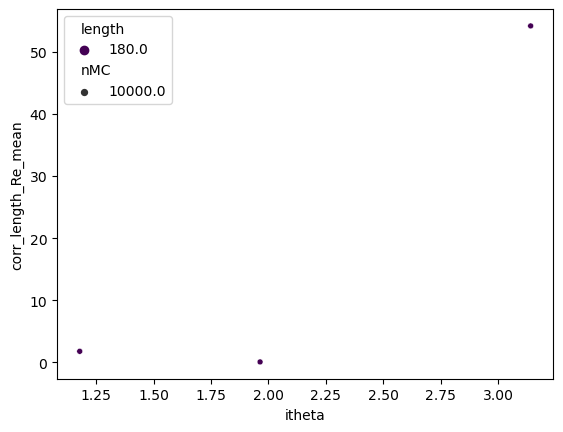

In [19]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

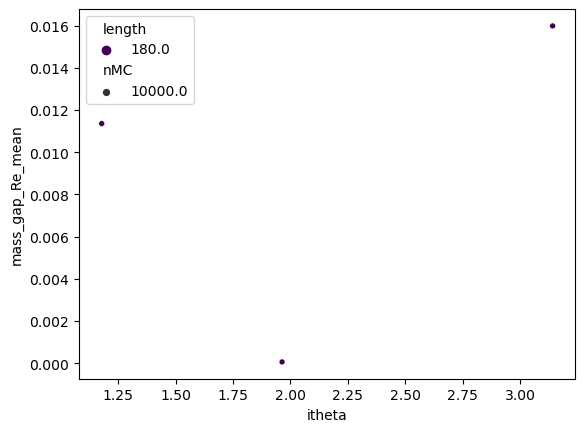

In [20]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

# Observable detailed plots with error (matplotlib)

In [21]:
lengths = df_stats["length"].unique()
print(lengths)
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

[180.]


In [24]:
df_stats[df_stats["length"]==180].head(10)

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,1.178097,1.6,10000.0,0.0,1.0,32400.0,13.6395,-66950.198127,-66966.266785,...,0.010374,0.428173,3.054366,0.0,0.0,0.002307,0.016454,75404.0,1256.733333,20.945556
1,180.0,1.963495,1.6,10000.0,0.0,1.0,32400.0,29.7850,-66774.747461,-66833.230171,...,0.010415,0.006082,2.727224,0.0,0.0,0.000025,0.011288,91077.0,1517.950000,25.299167
2,180.0,3.141593,1.6,10000.0,0.0,1.0,32400.0,74.0504,-66268.850435,-66501.486628,...,0.010345,5.070743,2.152973,0.0,0.0,0.007030,0.003402,74440.0,1240.666667,20.677778


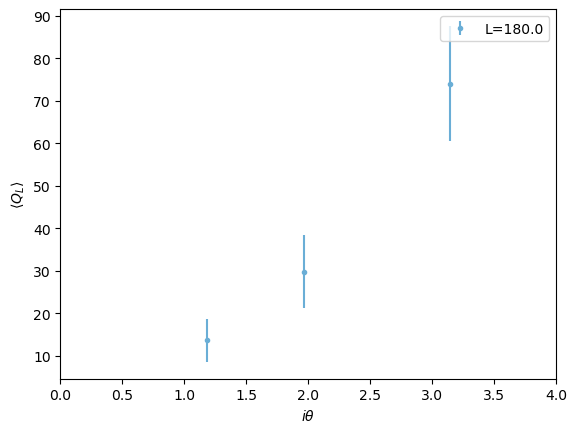

In [31]:
for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 0, freq = 1)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.xlim([0.0,4.0])
plt.xlabel(r"$i\theta$")
plt.ylabel(r"$\langle Q_L \rangle $")
#plt.title(observable)
plt.savefig("../Figs_README/Q_L_preliminary.jpg", format = "jpg")
plt.show()